목표: 선형회귀 모델 구축 
1. 설명
2. 예측

1, 모듈 불러오기 

In [2]:
#실습용 데이터 패키지 
from sklearn.datasets import load_boston
#데이터 전처리 패키지 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
#기계학습 모델 구축 및 평가 패키지 
import scipy as sp
import scipy.stats as stats 

import statsmodels.api as sm 
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
#데이터 시각화 패키지 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 
#한글 폰트 설정
plt.rc('font',family='Malgun Gothic')

2.데이터 불러오기
- 활용 데이터 : 보스턴 주택 가격에 대한 데이터 

In [3]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [4]:
#데이터 x값 
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
#데이터 y값
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
#데이터 변수명 확인 
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
#데이터 규격확인
boston.data.shape

(506, 13)

3. 데이터 전처리하기 

In [8]:
#데이터 프레임 형태로 변환 
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.DataFrame(boston.target,columns=['MEDV'])

In [9]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
# Train set / Test set 나누기 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)

4.선형회귀 모델 구축하기 
[statsmodels의 OLS를 사용하여 선형 회귀분석 시행] 
- OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합을 최소화하는 가중치 구하는 방법 
- 모델선언 : model=sm.OLS(Y데이터,X데이터)
- 모델학습 : model_trained=model.fit()

In [18]:
# B0 더해주는 것 
X_train=sm.add_constant(X_train) 
model = sm.OLS(y_train,X_train, axis=1)
model_trained = model.fit()

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


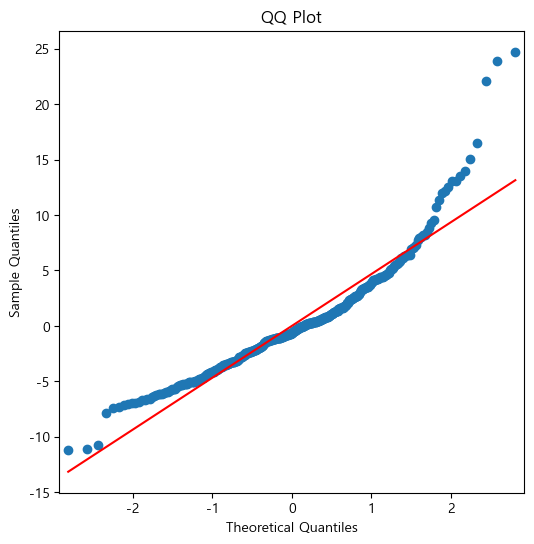

In [19]:
#선형회귀 모델 가정 확인하기 (확률 오차의 정규성 )
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False 
fig,ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(6)

sm.ProbPlot(model_residuals).qqplot(line='s',color='red',ax=ax)
ax.title.set_text('QQ Plot')

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

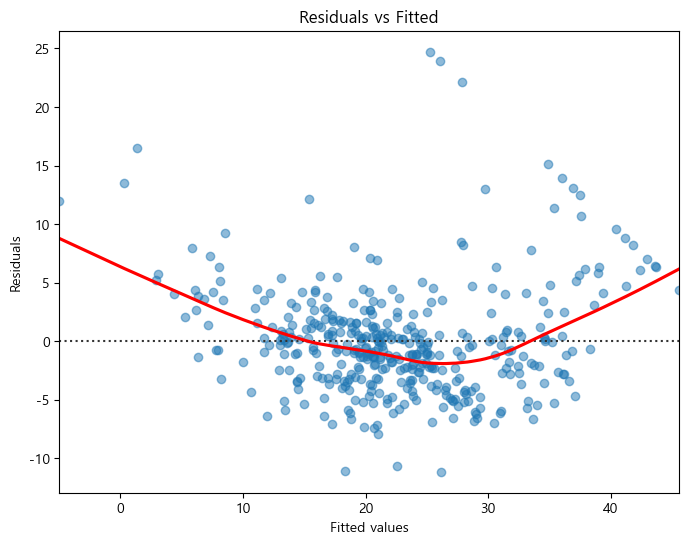

In [23]:
#선형회귀 모델 가정 확인하기 (확률 오차의 등분산성 )

model_fitted_y= model_trained.fittedvalues

plt.rcParams['axes.unicode_minus'] = False 
fig,ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)

sns.residplot(model_fitted_y,y_train,data=X_train,lowess=True,scatter_kws={'alpha':0.5},line_kws={'color':'red'},ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values',ylabel='Residuals')


설명 : 통계적으로 해석하기 
- R-squared(결정계수) : 모형의 성능 
- coef(회귀계수) : x가 한단위 증가시 y 변화량 
- P value : 0.05 이하일떄 변수가 유의미 

In [25]:
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.02e-110
Time:                        17:29:30   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.000      23.585      46.564
CRIM          -0.1146      0.034     -3.419      0.001      -0.180      -0.049
ZN             0.0532      0.015      3.488      0.001       0.023       0.083
INDUS          0.0033      0.068      0.048      0.962      -0.131       0.138
CHAS           3.5085      1.013      3.464      0.001       1.517       5.500
NOX          -18.1357      4.211     -4.307      0.000     -26.414      -9.857
RM             3.8252      0.478      8.011      0.000       2.886       4.764
AGE            0.0111      0.015      0.714      0.476      -0.019       0.042
DIS           -1.5300      0.227     -6.731      0.000      -1.977      -1.083
RAD            0.3392      0.071      4.747      0.000       0.199       0.480
TAX           -0.0119      0.004     -2.918      0.004      -0.020      -0.004
PTRATIO       -0.8842      0.149     -5.920      0.000      -1.178      -0.591
B              0.0095      0.003      3.227      0.001       0.004       0.015
LSTAT         -0.5782      0.059     -9.850      0.000      -0.694      -0.463
==============================================================================
Omnibus:                      137.227   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              530.658
Skew:                           1.475   Prob(JB):                    5.88e-116
Kurtosis:                       7.777   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p value 값이 유난히 높은 INDUS ,AGE 제거 

In [27]:
model = sm.OLS(y_train,X_train.drop(['INDUS','AGE'], axis=1))
model_trained= model.fit()
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.19e-112
Time:                        17:33:41   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.000      23.260      45.999
CRIM          -0.1149      0.033     -3.441      0.001      -0.181      -0.049
ZN             0.0522      0.015      3.449      0.001       0.022       0.082
CHAS           3.5374      1.007      3.514      0.000       1.558       5.516
NOX          -17.2688      3.883     -4.447      0.000     -24.903      -9.635
RM             3.9019      0.463      8.426      0.000       2.991       4.812
DIS           -1.5845      0.208     -7.603      0.000      -1.994      -1.175
RAD            0.3354      0.068      4.931      0.000       0.202       0.469
TAX           -0.0118      0.004     -3.253      0.001      -0.019      -0.005
PTRATIO       -0.8708      0.146     -5.949      0.000      -1.159      -0.583
B              0.0097      0.003      3.293      0.001       0.004       0.015
LSTAT         -0.5624      0.054    -10.385      0.000      -0.669      -0.456
==============================================================================
Omnibus:                      141.554   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.018
Skew:                           1.511   Prob(JB):                    2.75e-124
Kurtosis:                       7.967   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

예측 : 미래의 반응변수 값 예측하기 

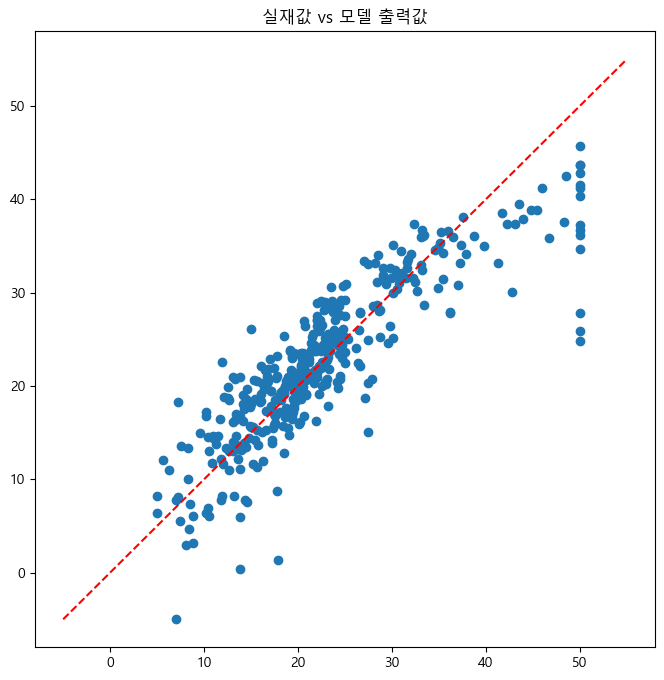

In [40]:
y_train_pred=model_trained.fittedvalues
plt.figure(figsize=(8,8))
plt.title('실재값 vs 모델 출력값')
plt.scatter(y_train,y_train_pred)
plt.plot([-5,55],[-5,55],ls='--',c='red')

In [28]:
X_test=sm.add_constant(X_test)

In [30]:
y_test_pred=model_trained.predict(X_test.drop(['INDUS','AGE'],axis=1))
y_test_pred.head()

210    22.787949
24     15.482380
36     22.346630
439    13.433993
161    36.890921
dtype: float64

In [31]:
#결정계수
r2_score(y_test,y_test_pred)

0.6389403215499552

By sklearn 

In [41]:
from sklearn.linear_model import LinearRegression

In [44]:
lr_skl=LinearRegression(fit_intercept=True) # 상수항이 있는가 ? -> 없으면 FALSE 
lr_skl.fit(X_train,y_train)
y_pred_skl=lr_skl.predict(X_test)

In [45]:
r2_score(y_test,y_pred_skl)

0.6352336167833788